In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as random
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Generate data
Generate 50 random datapoints in 2 dimensions.
Note that the last column is fixed at 1 to capture the offset

In [2]:
random.seed(0)
#set data size and dimensions
n = 50
d = 2
# generate input: the rows of X are the data points
# notice the last column encodes the offset
X = random.randn(n, d+1)
X[:, d] = 1

# Generate the target function wFind
# Store the correct decision for each datapoint in y
wFind = random.randn(d+1)
y = np.sign(np.dot(X, wFind))

columns = ['x'+str(d) for d in range(d)] + ['const', 'y']
data = np.concatenate((X, y.reshape(50, 1)), axis=1)
Xy = pd.DataFrame(data=data,columns=columns)

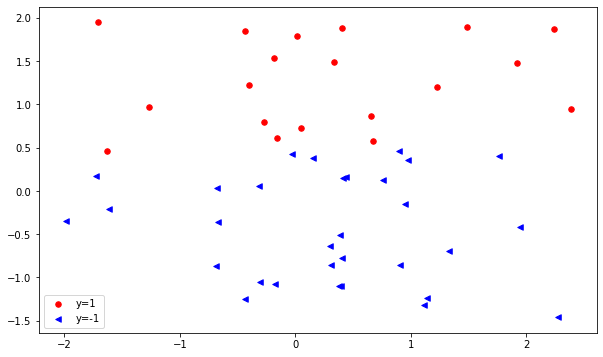

In [27]:
XyPos = Xy.loc[Xy['y']>0, :]
XyNeg = Xy.loc[Xy['y']<0, :]
f, ax = plt.subplots(figsize=(10, 6))
ax.scatter(XyPos['x0'], XyPos['x1'], marker="o", s=30, c='red', label='y=1')
ax.scatter(XyNeg['x0'], XyNeg['x1'], marker="<", s=30, c='blue', label='y=-1')
ax.legend(loc='best')

In [28]:
"""
This function takes data points X, plots them, and colors them correctly according to y.
This function also plots the line w'*x = 0.
We are plotting just the first two dimensions of x; 
the last (offset) coordinate of w sets the offset of the line from the origin.
"""
def plot_perceptron(X, y, w):
    # plot data points X and color according to y
    data = np.concatenate((X[:, :2], y.reshape(-1, 1)), axis=1)
    columns=['x0', 'x1', 'y']
    Xy = pd.DataFrame(data=data, columns=columns)
    XyPos = Xy.loc[Xy['y']>0, :]
    XyNeg = Xy.loc[Xy['y']<0, :]
    
    f, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(XyPos['x0'], XyPos['x1'], marker="o", s=50, c='red', label='y=1')
    ax.scatter(XyNeg['x0'], XyNeg['x1'], marker="<", s=50, c='blue', label='y=-1')
    
    #plot the hyperplane
    x0lim = np.linspace(int(np.min(X[:, 0])*100), int(np.max(X[:, 0])+0.5)*100, num=1000)/100
    x1cal = -(w[2]+w[0]*x0lim)/w[1]
    ax.plot(x0lim, x1cal, c='k', label='classification boundary')
    ax.legend(loc='best')

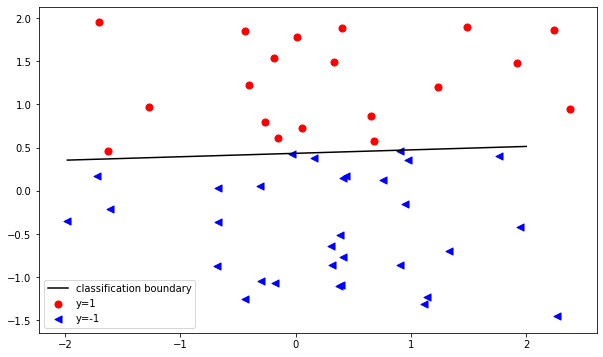

In [29]:
plot_perceptron(X, y, wFind)

# a) Code the missing parts of the Perceptron algorithm
Inputs to Perceptron are: 
* required arguments:
    * X = data points
    * Y = true values
* optional arguments:
    * maxsteps = maximum number of updates to w (default: 100)
    * w = initial guess of w (default: random)

Perceptron should start with the input guess of w, make at most maxsteps updates, and return the final w.

In [30]:
def perceptron(X, y, maxsteps=10000, w='default', hasIter=False, shuffle=False):
    if w == 'default':
        w = random.randn(np.shape(X)[1])#default w is randomly produced
    nIter = 0 # times of iteration
    isWrongPointsExist = True # whether wrong points exsist
    size = np.shape(X)[0] #size of data set
    while isWrongPointsExist and nIter <= maxsteps:
        #shuffle the data set
        if shuffle:
            shuffle_index = np.arange(size)
            random.shuffle(shuffle_index)
            X,y = X[shuffle_index, :], y[shuffle_index] 
        isWrongPointsExist = False
        for i in range(size):
            if y[i]*np.dot(X[i, :], w) < 0:
                #print (str(i).zfill(4), end='  ')
                isWrongPointsExist = True
                w += X[i, :]*y[i]
                #print ("w=", w)
                break
        nIter += 1
    #whether print algorithm details and return total iteration times
    if not hasIter:
        if nIter > maxsteps:
            print ("algorithm does not converge!", "w=", w)
            return w
        else:
            print ("algorithm does converge! ")
            print ("w = ", w)
            print ( "iteration times:", nIter)
            return w
    else:
        return w, nIter

# b) Run perceptron on linearly separable data set

algorithm does converge! 
w =  [-1.00777151  8.50597404 -4.14746865]
iteration times: 52


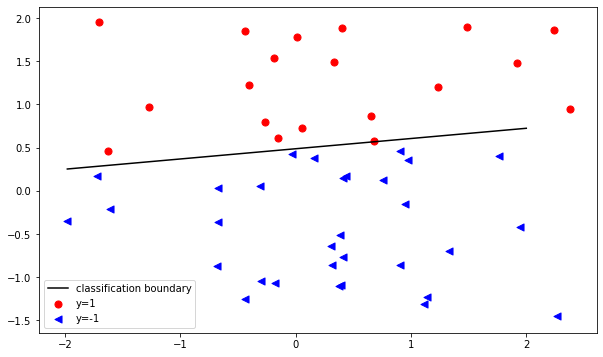

In [32]:
w = perceptron(X, y)
plot_perceptron(X, y, w)

# c) Run perceptron on data sets of size n = 20, 100, and 1000

In [33]:
def getDataSet(n=50, d=2, seed=0):
    #n:size, d:dimension
    random.seed(seed)
    X = random.randn(n, d+1)
    X[:, d] = 1
    wFind = random.randn(d+1)
    y = np.sign(np.dot(X, wFind))
    return X, y, wFind

## c.1) Run perceptron on data sets of size n = 20

algorithm does converge! 
w =  [-2.52061463 -0.721122   -3.40178094]
iteration times: 8


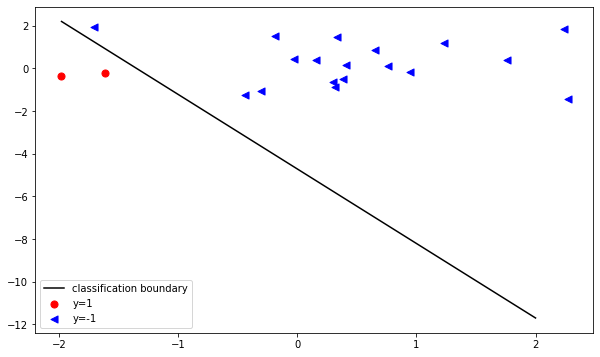

In [34]:
X20, y20, wFind20 = getDataSet(20)
w20 = perceptron(X20, y20)
plot_perceptron(X20, y20, w20)

## c.2) Run perceptron on data sets of size n =  100

algorithm does converge! 
w =  [-4.77571932  6.02488126 -0.46071979]
iteration times: 33


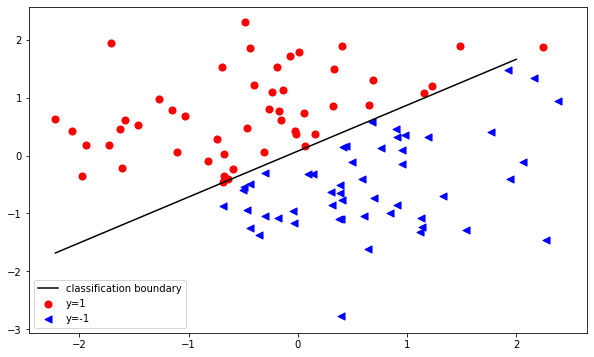

In [35]:
X100, y100, wFind100 = getDataSet(100)
w100 = perceptron(X100, y100)
plot_perceptron(X100, y100, w100)

## c.3) Run perceptron on data sets of size n =  1000

algorithm does converge! 
w =  [31.41899763 11.15129854 -2.39373371]
iteration times: 1399


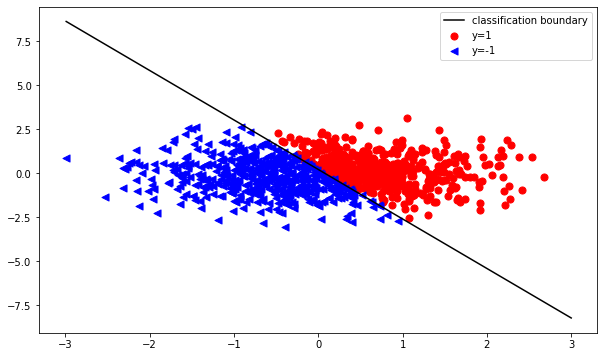

In [36]:
X1000, y1000, wFind1000 = getDataSet(1000)
w1000 = perceptron(X1000, y1000)
plot_perceptron(X1000, y1000, w1000)

# d) Run perceptron on data set of size n = 1000 with dimension d = 10

algorithm does converge! 
w =  [  3.31872103  -3.34769715  30.80249719  31.79676364  -1.59206203
  32.46688423  74.51032585 -66.69120265  15.80831016 -33.01910602
 -42.73888586]
iteration times: 2506


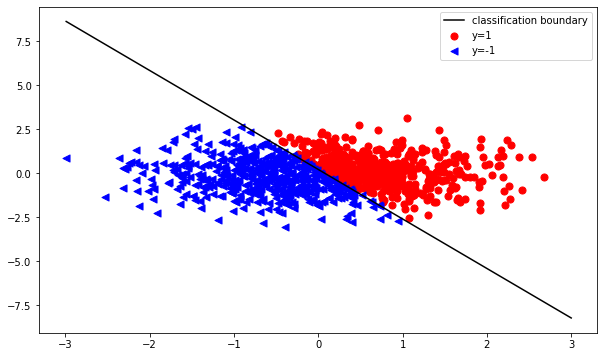

In [37]:
X1000_10, y1000_10, wFind1000_10 = getDataSet(1000, 10)
w1000_10 = perceptron(X1000_10, y1000_10)
plot_perceptron(X1000, y1000, w1000)

# e) Run perceptron on dataset from (d) 100 times.
Plot a histogram for the number of updates that the algorithm takes to converge.

For this portion, make sure your perceptron implementation picks the next consideration point x(t) randomly instead of deterministically.

In [23]:
iterTimes = []
for i in range(100):
    #here, we set shuffle=True to pick the next consideration point x(t) randomly
    w, iterTime = perceptron(X1000_10, y1000_10, w='default', hasIter=True, shuffle=True)
    iterTimes.append(iterTime)

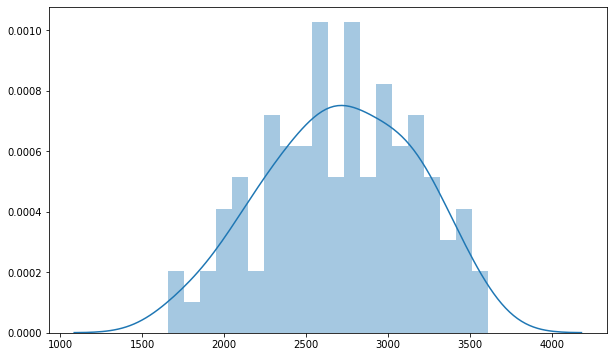

In [24]:
f, ax = plt.subplots(figsize=(10, 6))
sns.distplot(iterTimes, bins=20)

# f) Summarize your conclusions with respect to accuracy and running time as a function of n (size of data set) and d (dimension).

accuracy is independent of n and d, running times is about n*d/4

# g) Add an outlier. What happens?

algorithm does not converge! w= [  2.56425646  53.15971762 -21.66347829]


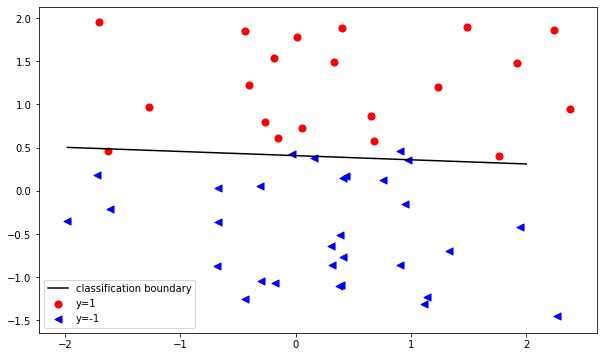

In [38]:
#use the same data set in (b) but add an outlire
random.seed(0)
#set data size and dimensions
n = 50
d = 2
# generate input: the rows of X are the data points
# notice the last column encodes the offset
X = random.randn(n, d+1)
X[:, d] = 1

# Generate the target function wFind
# Store the correct decision for each datapoint in y
wFind = random.randn(d+1)
y = np.sign(np.dot(X, wFind))

y[0] = 1 #outlier
w = perceptron(X, y)
plot_perceptron(X, y, w)

the algorithm cannot converge!

# h) Try out one idea to fix perceptron

In my opinion, if there exists any outlier in the dataset, the perceptron can never converge since the dataset is not linear separable.
If we are trying to find the best perceptron under such circumstance, we can record the sum of margin of every misclassifies point and we choose the w making the sum smallest.